In [3]:
import pandas as pd
import json
from phd import get_phd


def read_jsonl_with_json(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                json_object = json.loads(line)
                data.append(json_object)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON on line: {line.strip()}, error: {e}")
    return data

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
file_path = 'data/fractal_dim/mistral_7b_1.0_wikipedia_continue_it.jsonl'
jsonl_data = read_jsonl_with_json(file_path)
df_tmp = pd.DataFrame(jsonl_data)

In [6]:
human_phd = get_phd(df_tmp.iloc[:30, :], 'original_text', n_tries=10)

100%|███████████████████████████████████████████| 30/30 [09:03<00:00, 18.12s/it]


In [7]:
llm_phd = get_phd(df_tmp.iloc[:30, :], 'llm_text', n_tries=10)

100%|███████████████████████████████████████████| 30/30 [08:43<00:00, 17.45s/it]


array([[<Axes: title={'center': '0'}>]], dtype=object)

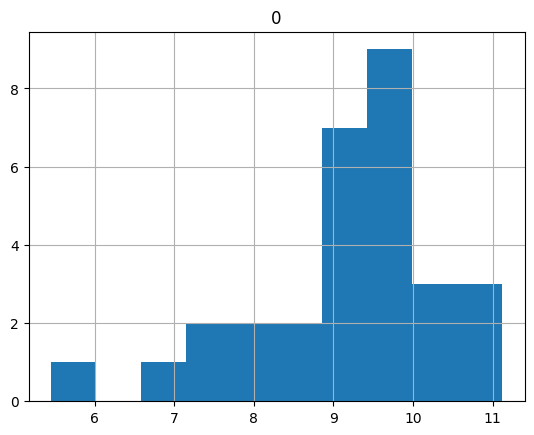

In [8]:
pd.DataFrame(human_phd).hist(bins=10)

array([[<Axes: title={'center': '0'}>]], dtype=object)

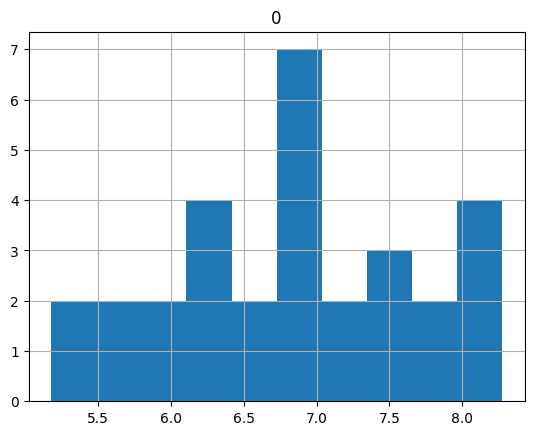

In [9]:
pd.DataFrame(llm_phd).hist(bins=10)

In [10]:
pd.DataFrame(human_phd).mean()

0    9.147102
dtype: float64

In [11]:
pd.DataFrame(llm_phd).mean()

0    6.853193
dtype: float64